In [1]:
%pip install numpy pandas matplotlib scikit-learn seaborn scipy statsmodels

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy

from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 3.9 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]
Note: you may need to restart the kernel to use updated packages.


In [2]:
DATA_PATH = 'https://raw.githubusercontent.com/RFUNN/Lab/refs/heads/main/student_data.csv'

data = pd.read_csv(DATA_PATH)

In [3]:
data.head(20)

,student_id,age,gender,study_hours_per_day,social_media_hours,online_movie_view_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6
8,S1008,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,3,Bachelor,Good,1,No,78.9
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0


In [4]:
data.describe()

,age,study_hours_per_day,social_media_hours,online_movie_view_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,20.501502,3.550751,2.507007,1.819119,84.129830,6.469770,3.044044,5.437437,69.605205
std,2.306597,1.469481,1.172040,1.075499,9.403768,1.226947,2.025405,2.848872,16.896616
min,17.000000,0.000000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,19.000000,2.600000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.450000
50%,20.000000,3.500000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.000000,4.500000,3.300000,2.550000,91.050000,7.300000,5.000000,8.000000,81.350000
max,24.000000,8.300000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [5]:
data.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
online_movie_view_hours           0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [6]:
data["parental_education_level"].fillna('No Data')

0           Master
1      High School
2      High School
3           Master
4           Master
          ...     
994    High School
995    High School
996       Bachelor
997       Bachelor
998       Bachelor
Name: parental_education_level, Length: 999, dtype: object

In [7]:
data.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
online_movie_view_hours           0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [8]:
data.head(20)

,student_id,age,gender,study_hours_per_day,social_media_hours,online_movie_view_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6
8,S1008,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,3,Bachelor,Good,1,No,78.9
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0


In [9]:
data = data.drop(['student_id', 'age', 'online_movie_view_hours', 'attendance_percentage', 'sleep_hours', 'diet_quality', 'exercise_frequency', 'internet_quality', 'mental_health_rating', 'extracurricular_participation'], axis=1)

In [10]:
data.head(5)

,gender,study_hours_per_day,social_media_hours,part_time_job,parental_education_level,exam_score
0,Female,0.0,1.2,No,Master,56.2
1,Female,6.9,2.8,No,High School,100.0
2,Male,1.4,3.1,No,High School,34.3
3,Female,1.0,3.9,No,Master,26.8
4,Female,5.0,4.4,No,Master,66.4


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Замена текстовых данных на числовые
data['gender'] = le.fit_transform(data['gender'])
data['part_time_job'] = le.fit_transform(data['part_time_job'])
data['parental_education_level'] = le.fit_transform(data['parental_education_level'])

In [12]:
data.head(20)

,gender,study_hours_per_day,social_media_hours,part_time_job,parental_education_level,exam_score
0,0,0.0,1.2,0,2,56.2
1,0,6.9,2.8,0,1,100.0
2,1,1.4,3.1,0,1,34.3
3,0,1.0,3.9,0,2,26.8
4,0,5.0,4.4,0,2,66.4
5,1,7.2,1.3,0,2,100.0
6,0,5.6,1.5,1,2,89.8
7,0,4.3,1.0,1,0,72.6
8,0,4.4,2.2,0,0,78.9
9,0,4.8,3.1,0,0,100.0


In [13]:
A = 0
B = 1
C = 2

data['exam_score'] = np.where(data['exam_score'] <= 65, A, data['exam_score']).astype(float)
data.loc[data['exam_score'] <= 65, 'exam_score'] = A
data.loc[(65 < data['exam_score']) & (data['exam_score'] <= 80), 'exam_score'] = B
data.loc[data['exam_score'] > 80, 'exam_score'] = C

In [14]:
data.head(5)

,gender,study_hours_per_day,social_media_hours,part_time_job,parental_education_level,exam_score
0,0,0.0,1.2,0,2,0.0
1,0,6.9,2.8,0,1,2.0
2,1,1.4,3.1,0,1,0.0
3,0,1.0,3.9,0,2,0.0
4,0,5.0,4.4,0,2,1.0


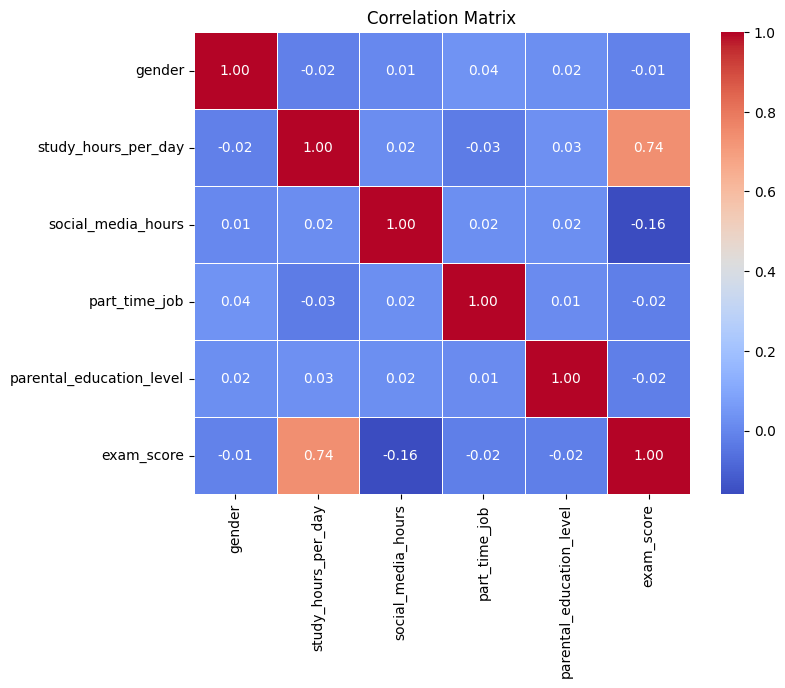

In [15]:
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


По таблице корреляции видно, что характеристика *exam_score* не коррелирует с *parental_education_level*, но коррелирует с *study_hours_per_day*

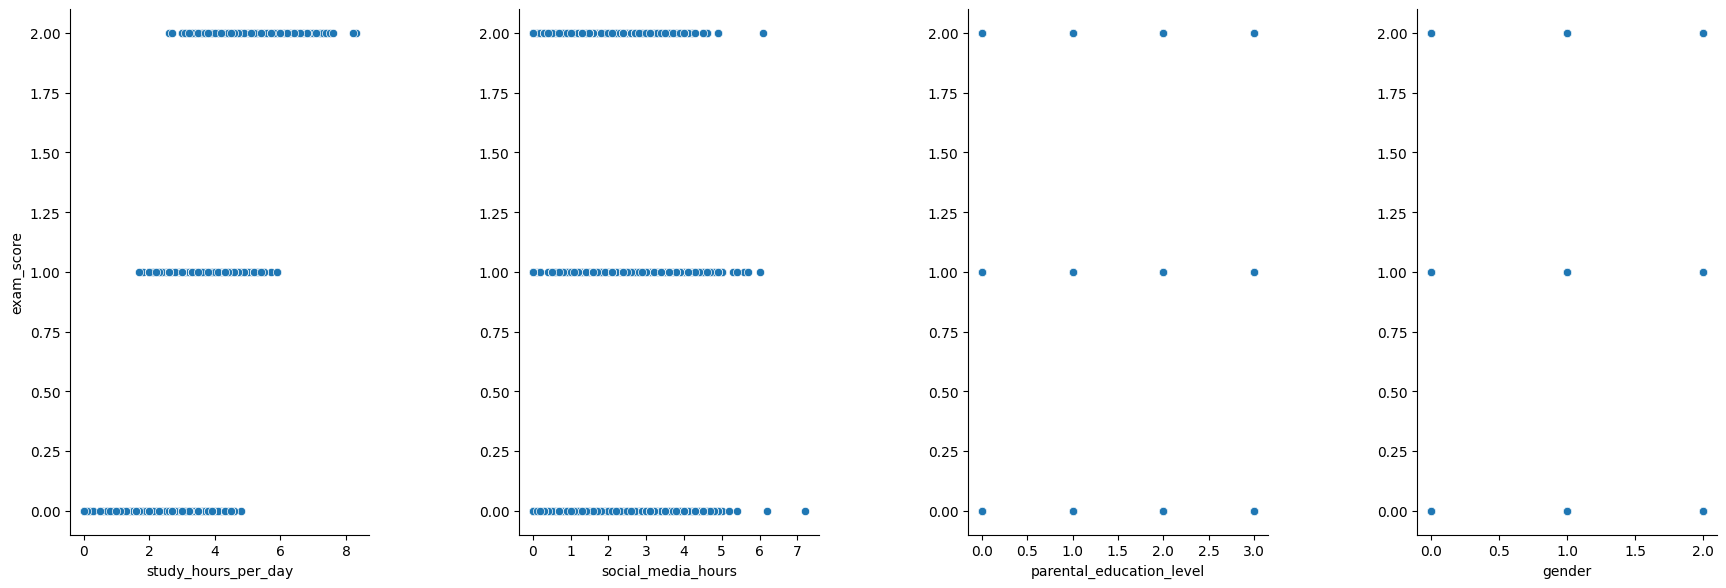

In [16]:
g = sns.pairplot(
    data,
    x_vars=["study_hours_per_day", "social_media_hours", 'parental_education_level', 'gender'],
    y_vars=["exam_score"],
)
for ax in g.axes.flat:
    ax.tick_params(axis='both', labelleft=True, labelbottom=True)


g.fig.set_size_inches(18,7)

plt.subplots_adjust(wspace=0.5, hspace=0.3)

sns.set_context("paper", rc={"axes.labelsize":26})


plt.show()

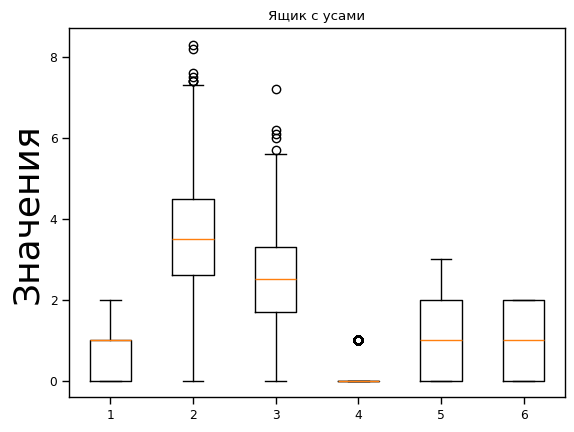

In [17]:
# Построение ящика с усами
plt.boxplot(data)
plt.ylabel('Значения')
plt.title('Ящик с усами')
plt.show()

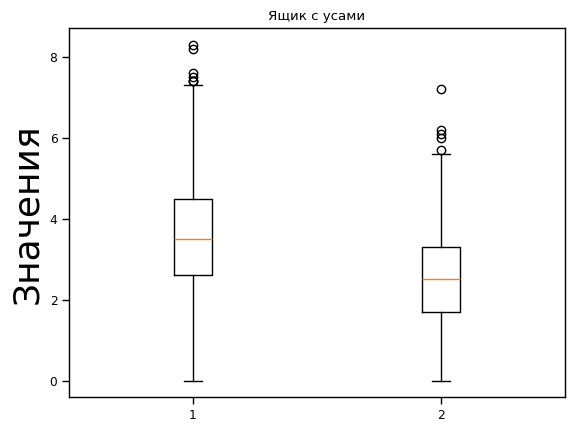

In [18]:
# Построение ящика с усами
plt.boxplot([data['study_hours_per_day'], data['social_media_hours']])
plt.ylabel('Значения')
plt.title('Ящик с усами')
plt.show()

In [19]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Detect outliers
outliers = detect_outliers_iqr(data['study_hours_per_day'])

In [20]:
data_cleaned = data[~outliers]

In [21]:
# Detect outliers
outliers = detect_outliers_iqr(data_cleaned['social_media_hours'])
data_cleaned = data_cleaned[~outliers]

In [22]:
data_cleaned.head(10)
print(len(data_cleaned['gender']), len(data_cleaned['study_hours_per_day']))

987 987


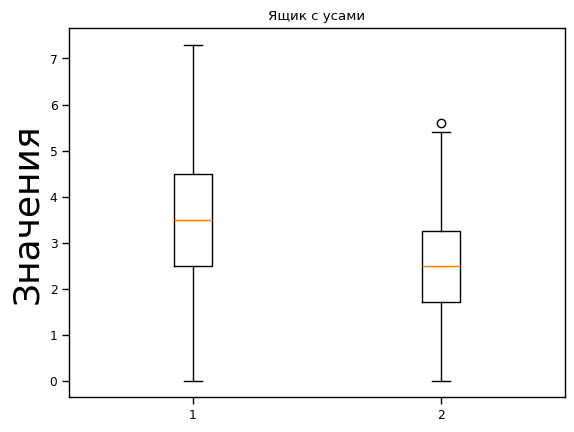

In [23]:
# Построение ящика с усами
plt.boxplot([data_cleaned['study_hours_per_day'], data_cleaned['social_media_hours']])
plt.ylabel('Значения')
plt.title('Ящик с усами')
plt.show()

In [24]:
correlation_matrix = data_cleaned.corr()
print(correlation_matrix['exam_score'])

gender                     -0.010064
study_hours_per_day         0.739671
social_media_hours         -0.166194
part_time_job              -0.022795
parental_education_level   -0.016132
exam_score                  1.000000
Name: exam_score, dtype: float64


In [25]:
def cost_function(X, y, theta):
    m = y.size
    error = np.dot(X, theta.T) - y
    cost = 1/(2*m) * np.dot(error.T, error)
    return cost, error

In [26]:
def gradient_descent(X, y, theta, alpha, iters):
    cost_array = np.zeros(iters)
    m = y.size
    for i in range(iters):
        cost, error = cost_function(X, y, theta)
        theta = theta - (alpha * (1/m) * np.dot(X.T, error))
        cost_array[i] = cost
    return theta, cost_array


In [27]:
def plotChart(iterations, cost_num):
    fig, ax = plt.subplots()
    ax.plot(np.arange(iterations), cost_num, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Error vs Iterations')
    plt.style.use('fivethirtyeight')
    plt.show()

In [28]:
# нормализуем

data = (data - data.mean()) / data.std()
data.head()

,gender,study_hours_per_day,social_media_hours,part_time_job,parental_education_level,exam_score
0,-0.976628,-2.416329,-1.115155,-0.521861,1.065398,-1.112329
1,-0.976628,2.279205,0.249985,-0.521861,0.001065,1.373614
2,0.762501,-1.463612,0.505949,-0.521861,0.001065,-1.112329
3,-0.976628,-1.735817,1.188520,-0.521861,1.065398,-1.112329
4,-0.976628,0.986232,1.615126,-0.521861,1.065398,0.130643


In [29]:
# Extract data into X and y
X = data_cleaned[['study_hours_per_day', 'social_media_hours']]
y = data_cleaned['exam_score']

In [30]:
# Add a 1 column to the start to allow vectorized gradient descent
X = np.c_[np.ones(X.shape[0]), X]

In [31]:
# Set hyperparameters
alpha = 0.01
iterations = 1000

In [32]:
# Initialize Theta Values to 0
theta = np.zeros(X.shape[1])
initial_cost, _ = cost_function(X, y, theta)

print('With initial theta values of {0}, cost error is {1}'.format(theta, initial_cost))

With initial theta values of [0. 0. 0.], cost error is 0.7152988855116515


In [33]:
# Run Gradient Descent
theta, cost_num = gradient_descent(X, y, theta, alpha, iterations)

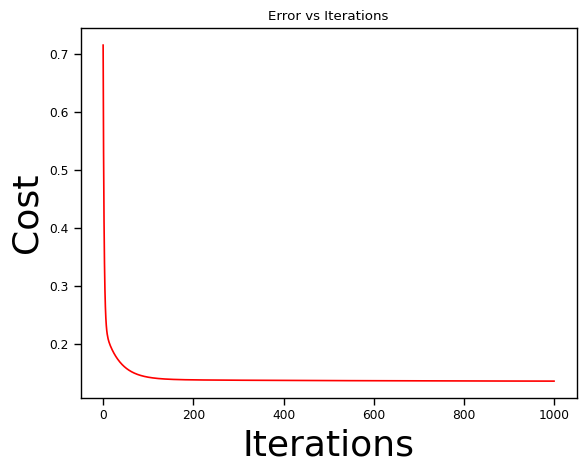

In [34]:
# Display cost chart
plotChart(iterations, cost_num)

In [35]:
final_cost, _ = cost_function(X, y, theta)

print('With final theta values of {0}, cost error is {1}'.format(theta, final_cost))


With final theta values of [-0.13846064  0.3962456  -0.14444707], cost error is 0.13630996317168137


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# The 'LinearRegression' model is initialized and fitted to the training data.
model = LinearRegression()
model.fit(X_train, y_train)

# The model is used to predict the target variable for the test set.
y_pred = model.predict(X_test)

In [37]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 0.28545899196795077
R-squared: 0.5576251803041337


In [38]:
print("Coefficients: \n", model.coef_)
print('Independent: \n', model.intercept_)

Coefficients: 
 [ 0.          0.43763689 -0.15547338]
Independent: 
 -0.21278345142572097


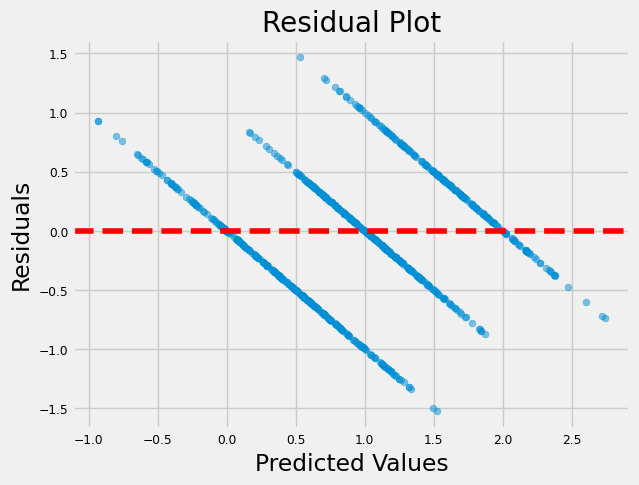

In [39]:
# Residual Plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

In [40]:


stat, p = scipy.stats.shapiro(residuals) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.997, p-value=0.133
Принять гипотезу о нормальности


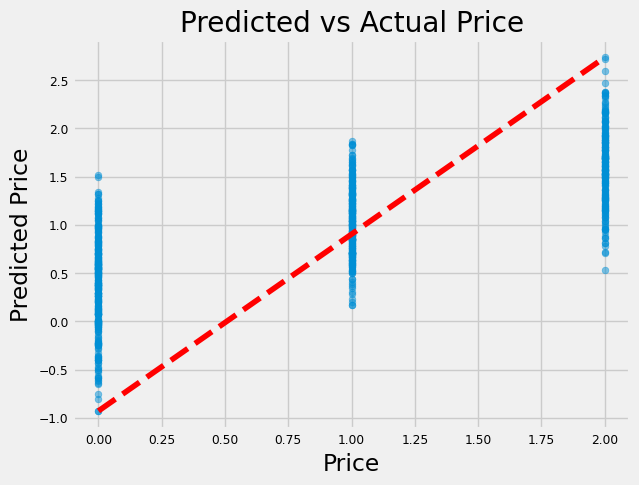

In [41]:
# Predicted vs Actual Plot
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Price')
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'r--', lw=4)
plt.show()

In [42]:
# Extract data into X and y
X = data_cleaned[['study_hours_per_day', 'social_media_hours']]
y = data_cleaned['exam_score']

In [43]:
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [44]:
y_pred = model.predict(X)

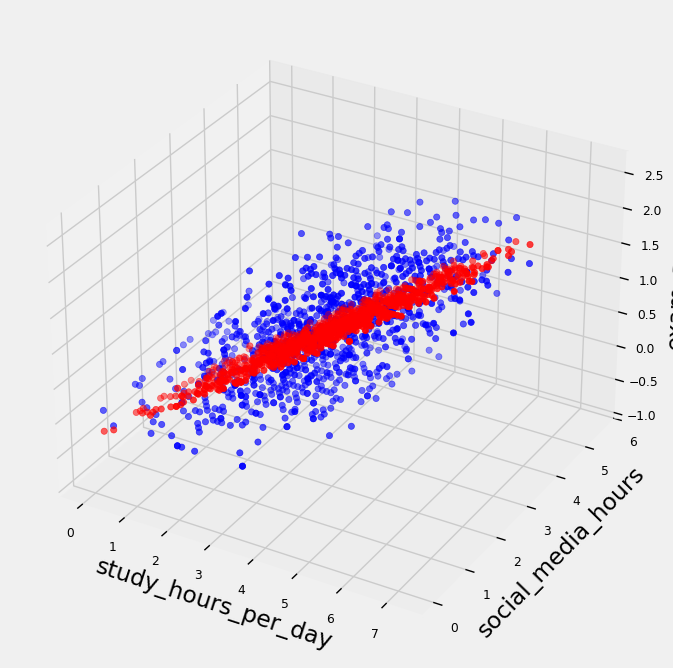

In [45]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['study_hours_per_day'], X['social_media_hours'], y, c='blue', marker='o')
ax.scatter(X['study_hours_per_day'], X['social_media_hours'], y_pred, c='red', marker='o')
# set your labels
ax.set_xlabel('study_hours_per_day')
ax.set_ylabel('social_media_hours')
ax.set_zlabel('exam_score')

plt.show()

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     154.2
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           8.32e-41
Time:                        21:31:58   Log-Likelihood:                -139.32
No. Observations:                 197   AIC:                             284.6
Df Residuals:                     194   BIC:                             294.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2128      0.122     -1.745      0.0

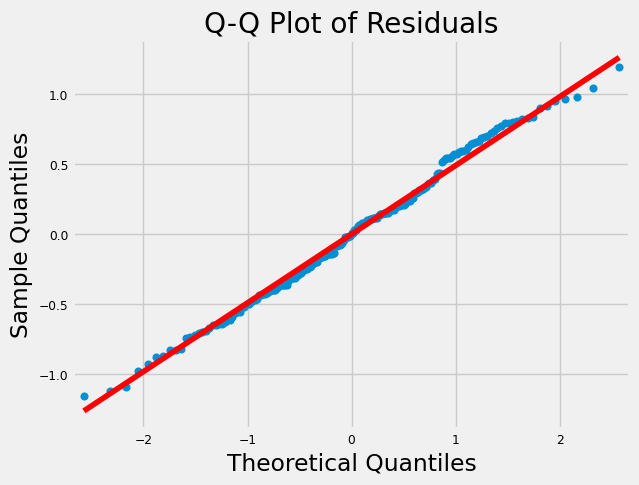

In [46]:
import statsmodels.api as sm

# Add a constant to the model
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

# Q-Q Plot for residuals
sm.qqplot(model_sm.resid, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# подробно прочитать https://habr.com/ru/articles/681218/

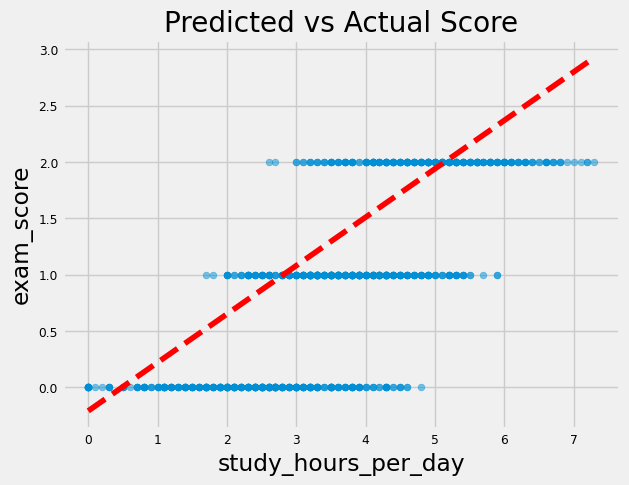

In [49]:
# Predicted vs Actual Plot

x_st = data_cleaned['study_hours_per_day']
y_ex = data_cleaned['exam_score']

plt.scatter(x_st, y_ex, alpha=0.5)
plt.xlabel('study_hours_per_day')
plt.ylabel('exam_score')
plt.title('Predicted vs Actual Score')

const = -0.21
x1 = 0.43

x_ = np.linspace(0, max(x_st), 100)
y_ = const + x_ * x1

plt.plot(x_, y_, 'r--', lw=4)
plt.show()

In [50]:
x_cel = 2.9
y_predred = const + x_cel * x1
print(y_predred)
EXAM = ['A', 'B', 'C']


score_pred = EXAM[round(y_predred)]

if score_pred == 'B':
    print('yes', score_pred)
else:
    print('no', y_predred)
    

1.037
yes B


https://www.geeksforgeeks.org/machine-learning/interpreting-the-results-of-linear-regression-using-ols-summary/

https://ru.python-3.com/?p=3622

https://colab.research.google.com/drive/1Sh7SStUHCLS2Fiz0nrHJ3icGUIofPTH-?invite=CJDm5osD#scrollTo=qfUy8CGd2VVF

https://habr.com/ru/companies/otus/articles/752434/

https://habr.com/ru/articles/684580/

https://madewithml.com/courses/foundations/pandas/

https://www.geeksforgeeks.org/python/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/

https://www.geeksforgeeks.org/python/how-to-delete-only-one-row-in-csv-with-python/

https://www.geeksforgeeks.org/data-analysis/working-with-missing-data-in-pandas/

https://www.geeksforgeeks.org/data-analysis/how-to-replace-values-in-column-based-on-condition-in-pandas/